In [1]:
import torch

In [2]:
x = torch.rand(10)
print(x, x.size())

tensor([0.6855, 0.4795, 0.2574, 0.4269, 0.4401, 0.4991, 0.5966, 0.1315, 0.8471,
        0.1119]) torch.Size([10])


In [10]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [7]:
panda = np.array(Image.open('panda.jpg').resize((224, 224))) # numpy数组格式
panda_tensor = torch.from_numpy(panda)                       # 转成torch张量

In [8]:
panda_tensor.size()

torch.Size([224, 224, 3])

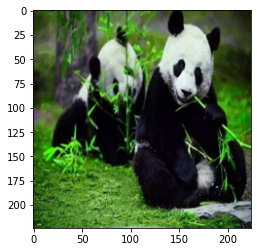

In [11]:
plt.imshow(panda)

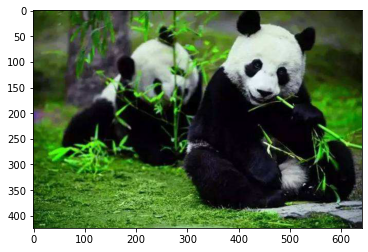

In [13]:
panda2 = np.array(Image.open('panda.jpg'))
plt.imshow(panda2)

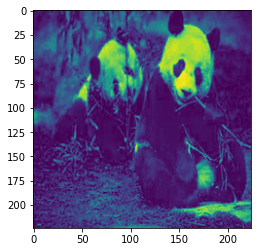

In [18]:
plt.imshow(panda_tensor[:, :, 2].numpy())  # 转成numpy

In [19]:
sales = torch.eye(5, 5)
sales

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

In [20]:
import time

In [21]:
ticks = time.time()
a = torch.rand(10000, 10000)
b = torch.rand(10000, 10000)
a.matmul(b)
print(time.time()  - ticks)

8.735029458999634


In [23]:
ticks = time.time()
a = torch.rand(10000, 10000)
b = torch.rand(10000, 10000)
a = a.cuda()
b = b.cuda()
a.matmul(b)
print(time.time()  - ticks)

2.841388463973999


In [25]:
x = torch.ones([2, 2], requires_grad=True)
y = x.mean()
y.backward()

In [26]:
x.grad

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])

#### numpy版本

In [28]:
N, D_in, H, D_out = 64, 1000, 100, 10
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for t in range(500):
    h = x.dot(w1)  # 求乘积
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)
    
    loss = np.square(y_pred - y).sum()
    print(t, loss)
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)  # T：转置矩阵
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)
    
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    

0 36450773.993850775
1 33587412.39966144
2 34681765.568034984
3 32869437.133619122
4 25536370.332029663
5 15805416.344413903
6 8324187.655280392
7 4258876.480093417
8 2389962.2916112784
9 1547495.7645976935
10 1130583.7442385897
11 891202.0835627988
12 732130.9724287683
13 615189.7571513479
14 523632.220317453
15 449548.72166593466
16 388377.7306248021
17 337176.933311193
18 294020.50136370835
19 257512.60116405075
20 226356.3652608814
21 199644.53428662542
22 176661.85293812997
23 156783.05253414455
24 139528.1135021622
25 124478.18361426525
26 111310.10051016316
27 99763.69371835534
28 89594.7364161752
29 80621.85056954951
30 72686.48786863383
31 65649.06891867054
32 59390.97101810316
33 53816.606135950635
34 48837.93488436819
35 44385.14488522296
36 40395.16331872726
37 36811.935002677536
38 33589.64485693089
39 30687.275584086652
40 28068.154832330118
41 25700.66722348472
42 23558.143947691773
43 21616.47279960052
44 19854.335215632924
45 18253.840965050887
46 16797.397265455606
47

480 2.4748048219881766e-06
481 2.3622944988950152e-06
482 2.254911847071697e-06
483 2.15243931190718e-06
484 2.0546266177482122e-06
485 1.96129145021947e-06
486 1.8722105333145322e-06
487 1.787166128934335e-06
488 1.7059999549196043e-06
489 1.6285241391048667e-06
490 1.5545804119089486e-06
491 1.4840072686662568e-06
492 1.4166338818786562e-06
493 1.3523338523593217e-06
494 1.2909618287629412e-06
495 1.2323823749574713e-06
496 1.1764899390565751e-06
497 1.1231153500984327e-06
498 1.0721679833319777e-06
499 1.0235424311171035e-06


#### pytorch版本

In [30]:
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")

N, D_in, H, D_out = 64, 1000, 100, 10
x = torch.randn(N, D_in, device = device, dtype = dtype)
y = torch.randn(N, D_out, device = device, dtype = dtype)
w1 = torch.randn(D_in, H, device = device, dtype = dtype)
w2 = torch.randn(H, D_out, device = device, dtype = dtype)

learning_rate = 1e-6
for t in range(500):
    h = x.mm(w1)  # 求乘积
    h_relu = h.clamp(min = 0)
    y_pred = h_relu.mm(w2)
    
    loss = (y_pred - y).pow(2).sum().item()  #  item是得到一个元素张量里面的元素值
    print(t, loss)
    
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)  # T：转置矩阵
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)
    
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 32302842.0
1 26480124.0
2 21765232.0
3 16608359.0
4 11530873.0
5 7480954.0
6 4728872.0
7 3044404.5
8 2049368.5
9 1458394.5
10 1093338.375
11 855112.875
12 690084.3125
13 569391.4375
14 477540.9375
15 405296.46875
16 347088.625
17 299399.6875
18 259826.21875
19 226653.875
20 198626.5625
21 174760.625
22 154321.75
23 136721.90625
24 121534.078125
25 108331.6953125
26 96832.8125
27 86773.8046875
28 77953.3515625
29 70189.0234375
30 63336.171875
31 57269.61328125
32 51883.03515625
33 47088.04296875
34 42799.19921875
35 38956.9921875
36 35506.99609375
37 32403.220703125
38 29606.921875
39 27082.65234375
40 24799.59375
41 22732.33203125
42 20858.203125
43 19157.439453125
44 17614.80078125
45 16209.546875
46 14928.302734375
47 13758.9091796875
48 12690.390625
49 11713.017578125
50 10817.9921875
51 9998.7236328125
52 9248.4052734375
53 8560.3359375
54 7928.216796875
55 7346.9580078125
56 6812.10009765625
57 6319.3662109375
58 5865.3994140625
59 5446.7080078125
60 5060.32080078125
61 4703.654

423 0.00013357702118810266
424 0.000130590662593022
425 0.00012837955728173256
426 0.0001260409044334665
427 0.0001234163501067087
428 0.00012118028098484501
429 0.00011917295341845602
430 0.00011655650450848043
431 0.00011408875434426591
432 0.00011194330727448687
433 0.00011005153646692634
434 0.00010805040801642463
435 0.00010642076085787266
436 0.00010479892080184072
437 0.00010233905049972236
438 0.00010058189218398184
439 9.866285836324096e-05
440 9.700829104986042e-05
441 9.502135071670637e-05
442 9.346616570837796e-05
443 9.199608757626265e-05
444 9.052857058122754e-05
445 8.893844642443582e-05
446 8.752804569667205e-05
447 8.59648353070952e-05
448 8.424902625847608e-05
449 8.318779873661697e-05
450 8.186823106370866e-05
451 8.007972792256624e-05
452 7.886262028478086e-05
453 7.754303078399971e-05
454 7.617584196850657e-05
455 7.525736873503774e-05
456 7.41237890906632e-05
457 7.286071922862902e-05
458 7.172030746005476e-05
459 7.064543751766905e-05
460 6.968024536035955e-05
46

##### Autograd

In [32]:
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")

N, D_in, H, D_out = 64, 1000, 100, 10
x = torch.randn(N, D_in, device = device, dtype = dtype)
y = torch.randn(N, D_out, device = device, dtype = dtype)
w1 = torch.randn(D_in, H, device = device, dtype = dtype, requires_grad = True)
w2 = torch.randn(H, D_out, device = device, dtype = dtype, requires_grad = True)
# requires_grad=True表示我们想在向后传递期间计算关于这些张量的梯度。

learning_rate = 1e-6
for t in range(500):
    # h = x.mm(w1)
    # h_relu = h.clamp(min = 0)
    # y_pred = h_relu.mm(w2)
    # 以上这些中间过程是不需要的，因为求梯度是自动的
    y_pred = x.mm(w1).clamp(min = 0).mm(w2)
    
    ## loss仍然是需要计算的
    loss = (y_pred - y).pow(2).sum()  #  不需要item
    if t % 100 == 99:
        print(t, loss.item())
    
    loss.backward()
    # will compute the gradient of loss w.r.t. to all Tensors with requires_grad=True.
    
    # torch.no_grad() 是一个上下文管理器，被该语句 wrap 起来的部分将不会track 梯度。
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        
        # 使用之后清零
        w1.grad.zero_()
        w2.grad.zero_()

99 736.90234375
199 6.279364109039307
299 0.09197124093770981
399 0.0018627869430929422
499 0.00015417377289850265


#### 7月4日

#### Define new autograd functions

In [1]:
import torch

In [4]:
class MyReLU(torch.autograd.Function):
    # 函数前加上@classmethon，则该函数变为类方法
    # 该函数只能访问到类的数据属性，不能获取实例的数据属性
    @staticmethod
    def forward(ctx, input):
        # ctx:  stash information for backward computation
        ctx.save_for_backward(input)
        return input.clamp(min = 0)
    
    @staticmethod
    def backward(ctx, grad_output):
        # receive the loss
        input, =ctx.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        return grad_input


dtype = torch.float
device = torch.device("cpu")

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in, device = device, dtype = dtype)
y = torch.randn(N, D_out, device = device, dtype = dtype)

w1 = torch.randn(D_in, H, device = device, dtype = dtype, requires_grad = True)
w2 = torch.randn(H, D_out, device = device, dtype = dtype, requires_grad = True)

learning_rate = 1e-6
for t in range(500):
    # apply our function
    relu = MyReLU.apply
    
    y_pred = relu(x.mm(w1)).mm(w2)
    
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())
    
    loss.backward()
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        
        w1.grad.zero_()
        w2.grad.zero_()

99 1224.872314453125
199 26.795305252075195
299 0.8363296985626221
399 0.028344282880425453
499 0.0013441101182252169


#### nn module

##### same learning_rate

In [8]:
# for large neural networks raw autograd can be a bit too low-level
N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# define our model as a sequence of layers
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

# Mean Squared Error (MSE)
# size_average = True，返回 loss.mean();如果 size_average = False，返回 loss.sum();
loss_fn = torch.nn.MSELoss(reduction = 'sum')

learning_rate = 1e-6
for t in range(500):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

99 640.7286987304688
199 595.0228881835938
299 555.3624267578125
399 520.3380737304688
499 489.1424560546875


In [3]:
import torch
# for large neural networks raw autograd can be a bit too low-level
N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# define our model as a sequence of layers
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H, bias = False),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out, bias = False),
)

# Mean Squared Error (MSE)
# size_average = True，返回 loss.mean();如果 size_average = False，返回 loss.sum();
loss_fn = torch.nn.MSELoss(reduction = 'sum')

learning_rate = 1e-6
for t in range(500):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

99 623.818603515625
199 583.5563354492188
299 547.1181030273438
399 514.0806274414062
499 483.813232421875


##### learning_rate *= 100

In [10]:
# for large neural networks raw autograd can be a bit too low-level
N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# define our model as a sequence of layers
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

# Mean Squared Error (MSE)
# size_average = True，返回 loss.mean();如果 size_average = False，返回 loss.sum();
loss_fn = torch.nn.MSELoss(reduction = 'sum')

learning_rate = 1e-4
for t in range(500):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

99 1.908002495765686
199 0.0238566342741251
299 0.0005694439169019461
399 1.741675441735424e-05
499 6.014125801812042e-07


#### Optim

In [12]:
# Calling the step function on an Optimizer makes an update to its parameters
# for large neural networks raw autograd can be a bit too low-level
N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# define our model as a sequence of layers
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

# Mean Squared Error (MSE)
# size_average = True，返回 loss.mean();如果 size_average = False，返回 loss.sum();
loss_fn = torch.nn.MSELoss(reduction = 'sum')

learning_rate = 1e-4
'''optim'''
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
for t in range(500):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    loss.backward()
    '''Optim'''
    optimizer.step()

99 49.66434097290039
199 0.5457544922828674
299 0.0009516655700281262
399 3.194136297679506e-07
499 1.5204232317600486e-10


#### Custom 

In [16]:
# define your own Modules by subclassing nn.Module and defining a forward
'''不需要backward'''
class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)
        
    def forward(self, x):
        h_relu = self.linear1(x).clamp(min = 0)
        y_pred = self.linear2(h_relu)
        return y_pred


N, D_in, H, D_out = 64, 1000, 100, 10
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

model = TwoLayerNet(D_in, H, D_out)
loss_fn = torch.nn.MSELoss(reduction = 'sum')
learning_rate = 1e-4
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for t in range(500):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
    
    # model.zero_grad()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

99 2.5932459831237793
199 0.04282639920711517
299 0.0018714769976213574
399 0.00013460872287396342
499 1.234930368809728e-05


#### Control Flow + Weight Sharing

In [18]:
# use normal Python flow control to implement the loop
# implement weight sharing among the innermost layers by reusing
# the same Module multiple times when defining the forward pass.
import random
class DynamicNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(DynamicNet, self).__init__()
        self.input_linear = torch.nn.Linear(D_in, H)
        self.middle_linear = torch.nn.Linear(H, H)
        self.output_linear = torch.nn.Linear(H, D_out)
        
    def forward(self, x):
        h_relu = self.input_linear(x).clamp(min = 0)
        for _ in range(random.randint(0, 3)):
            h_relu = self.middle_linear(h_relu).clamp(min = 0)
        y_pred = self.output_linear(h_relu)
        return y_pred

N, D_in, H, D_out = 64, 1000, 100, 10
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

model = TwoLayerNet(D_in, H, D_out)
loss_fn = torch.nn.MSELoss(reduction = 'sum')
learning_rate = 1e-4
# Training this strange model with vanilla stochastic gradient descent is tough
# so we use momentum (哇好神奇)
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum = 0.9)

for t in range(500):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
    
    # model.zero_grad()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

99 2.2051730155944824
199 0.031559936702251434
299 0.0009087725775316358
399 3.580223710741848e-05
499 1.6436448504464352e-06
